In [80]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [81]:
data = pd.read_csv('honda_car_selling.csv')

In [82]:
data.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [84]:
data.describe()

,Year
count,999.000000
mean,2014.717718
std,3.713756
min,2000.000000
25%,2013.000000
50%,2015.000000
75%,2017.000000
max,2023.000000


In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [86]:
data.isnull().sum()

Year          0
kms Driven    0
Fuel Type     0
Suspension    0
Price         0
Car Model     0
dtype: int64

In [87]:
data.drop_duplicates(keep=False)

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V
...,...,...,...,...,...,...
956,2015,59900 kms,Petrol,Automatic,5.65 Lakh,Honda Jazz 1.2 V AT i VTE
957,2016,37000 kms,Petrol,Manual,6.95 Lakh,Honda City i VTEC VX Opti
958,2018,120000 kms,Diesel,Manual,9 Lakh,Honda City i-DTEC ZX
959,2010,100000 kms,Petrol,Manual,3 Lakh,Honda Accord 2.4 MT


In [88]:
data.isna().mean() * 100 

Year          0.0
kms Driven    0.0
Fuel Type     0.0
Suspension    0.0
Price         0.0
Car Model     0.0
dtype: float64

In [89]:
data['Car Model'].unique()

array(['Honda City V CVT', 'Honda City ZX CVT',
       'Honda City i-VTEC CVT ZX', 'Honda City i VTEC V',
       'Honda City i DTEC S', 'Honda Jazz 1.5 SV i DTEC',
       'Honda City i DTEC VX', 'Honda WR-V i-VTEC VX',
       'Honda Amaze V CVT Petrol ', 'Honda Jazz 1.2 V i VTEC',
       'Honda City VX MT', 'Honda City i VTEC VX',
       'Honda Amaze S i-Vtech', 'Honda Jazz 1.2 V AT i VTE',
       'Honda Amaze S Petrol', 'Honda WR-V i-DTEC VX',
       'Honda Jazz 1.5 S i DTEC', 'Honda Amaze S i-DTEC',
       'Honda Amaze S i-Dtech', 'Honda City i DTEC V',
       'Honda City VX CVT', 'Honda Brio S MT', 'Honda Brio S Option MT',
       'Honda Brio 1.2 S MT', 'Honda Amaze V CVT Diesel ',
       'Honda Jazz 1.2 VX i VTEC', 'Honda Amaze VX AT i-Vtech',
       'Honda City V MT', 'Honda Amaze VX i-DTEC', 'Honda City ZX MT',
       'Honda City i VTEC SV', 'Honda Brio 1.2 VX MT',
       'Honda Amaze E i-DTEC', 'Honda City i VTEC CVT VX',
       'Honda City i DTEC SV', 'Honda Amaze VX i-Vtech',


# Merubah data dengan satuan menjadi angka saja (bahasa indonesia)
# Change the data with just numerical values

In [90]:
data["kms Driven"] = data["kms Driven"].str.strip()

In [14]:
print(data['kms Driven'])

0       19006 kms
1       11936 kms
2       29635 kms
3       16163 kms
4      105114 kms
          ...    
994     90000 kms
995     31500 kms
996     39735 kms
997     36000 kms
998     35341 kms
Name: kms Driven, Length: 999, dtype: object


In [91]:
data["kms Driven"] = data["kms Driven"].str.split().str.get(0)

In [92]:
print(data['kms Driven'])

0       19006
1       11936
2       29635
3       16163
4      105114
        ...  
994     90000
995     31500
996     39735
997     36000
998     35341
Name: kms Driven, Length: 999, dtype: object


In [93]:
data["kms Driven"] = data["kms Driven"].astype(int)

In [94]:
data["Fuel Type"] = data["Fuel Type"].str.strip()

In [95]:
print(data["Fuel Type"])

0      Petrol
1      Petrol
2      Petrol
3      Petrol
4      Petrol
        ...  
994    Petrol
995    Petrol
996    Petrol
997    Petrol
998    Diesel
Name: Fuel Type, Length: 999, dtype: object


In [96]:
data["Suspension"] = data["Suspension"].str.strip()

In [97]:
print(data["Suspension"])

0      Automatic
1      Automatic
2      Automatic
3      Automatic
4         Manual
         ...    
994       Manual
995       Manual
996       Manual
997       Manual
998       Manual
Name: Suspension, Length: 999, dtype: object


In [98]:
data["Price"] = data["Price"].str.strip()

In [99]:
print(data["Price"])

0       9.29 Lakh
1      13.95 Lakh
2       9.95 Lakh
3      13.26 Lakh
4       5.68 Lakh
          ...    
994     1.22 Lakh
995     4.25 Lakh
996     5.10 Lakh
997     6.10 Lakh
998        3 Lakh
Name: Price, Length: 999, dtype: object


In [100]:
# membersihkan dan mengonversi kolom "Price" dalam sebuah DataFrame
# clean and convert price column
def price_cleaner(values):
    output = values.split()
    result = [eval(i) for i in output]
    return np.prod(result)

data["Price"] = data["Price"].str.strip()
data["Price"] = data["Price"].str.replace(',','')
data["Price"] = data["Price"].str.replace('Lakh','100000')
data["Price"] = data["Price"].map(price_cleaner)

In [73]:
print(data["Price"])

0    400000
1    600000
2    800000
3    300000
4    200000
5    700000
6    500000
7    450000
8    150000
9    900000
Name: Price, dtype: int64


In [74]:
data["Price"] = data["Price"].astype(int) #mengonversi kolom "Price" dalam DataFrame data ke tipe data integer.

In [101]:
print(data["Price"]) 

0       929000.0
1      1395000.0
2       995000.0
3      1326000.0
4       568000.0
         ...    
994     122000.0
995     425000.0
996     510000.0
997     610000.0
998     300000.0
Name: Price, Length: 999, dtype: float64


Text(0, 0.5, 'Price')

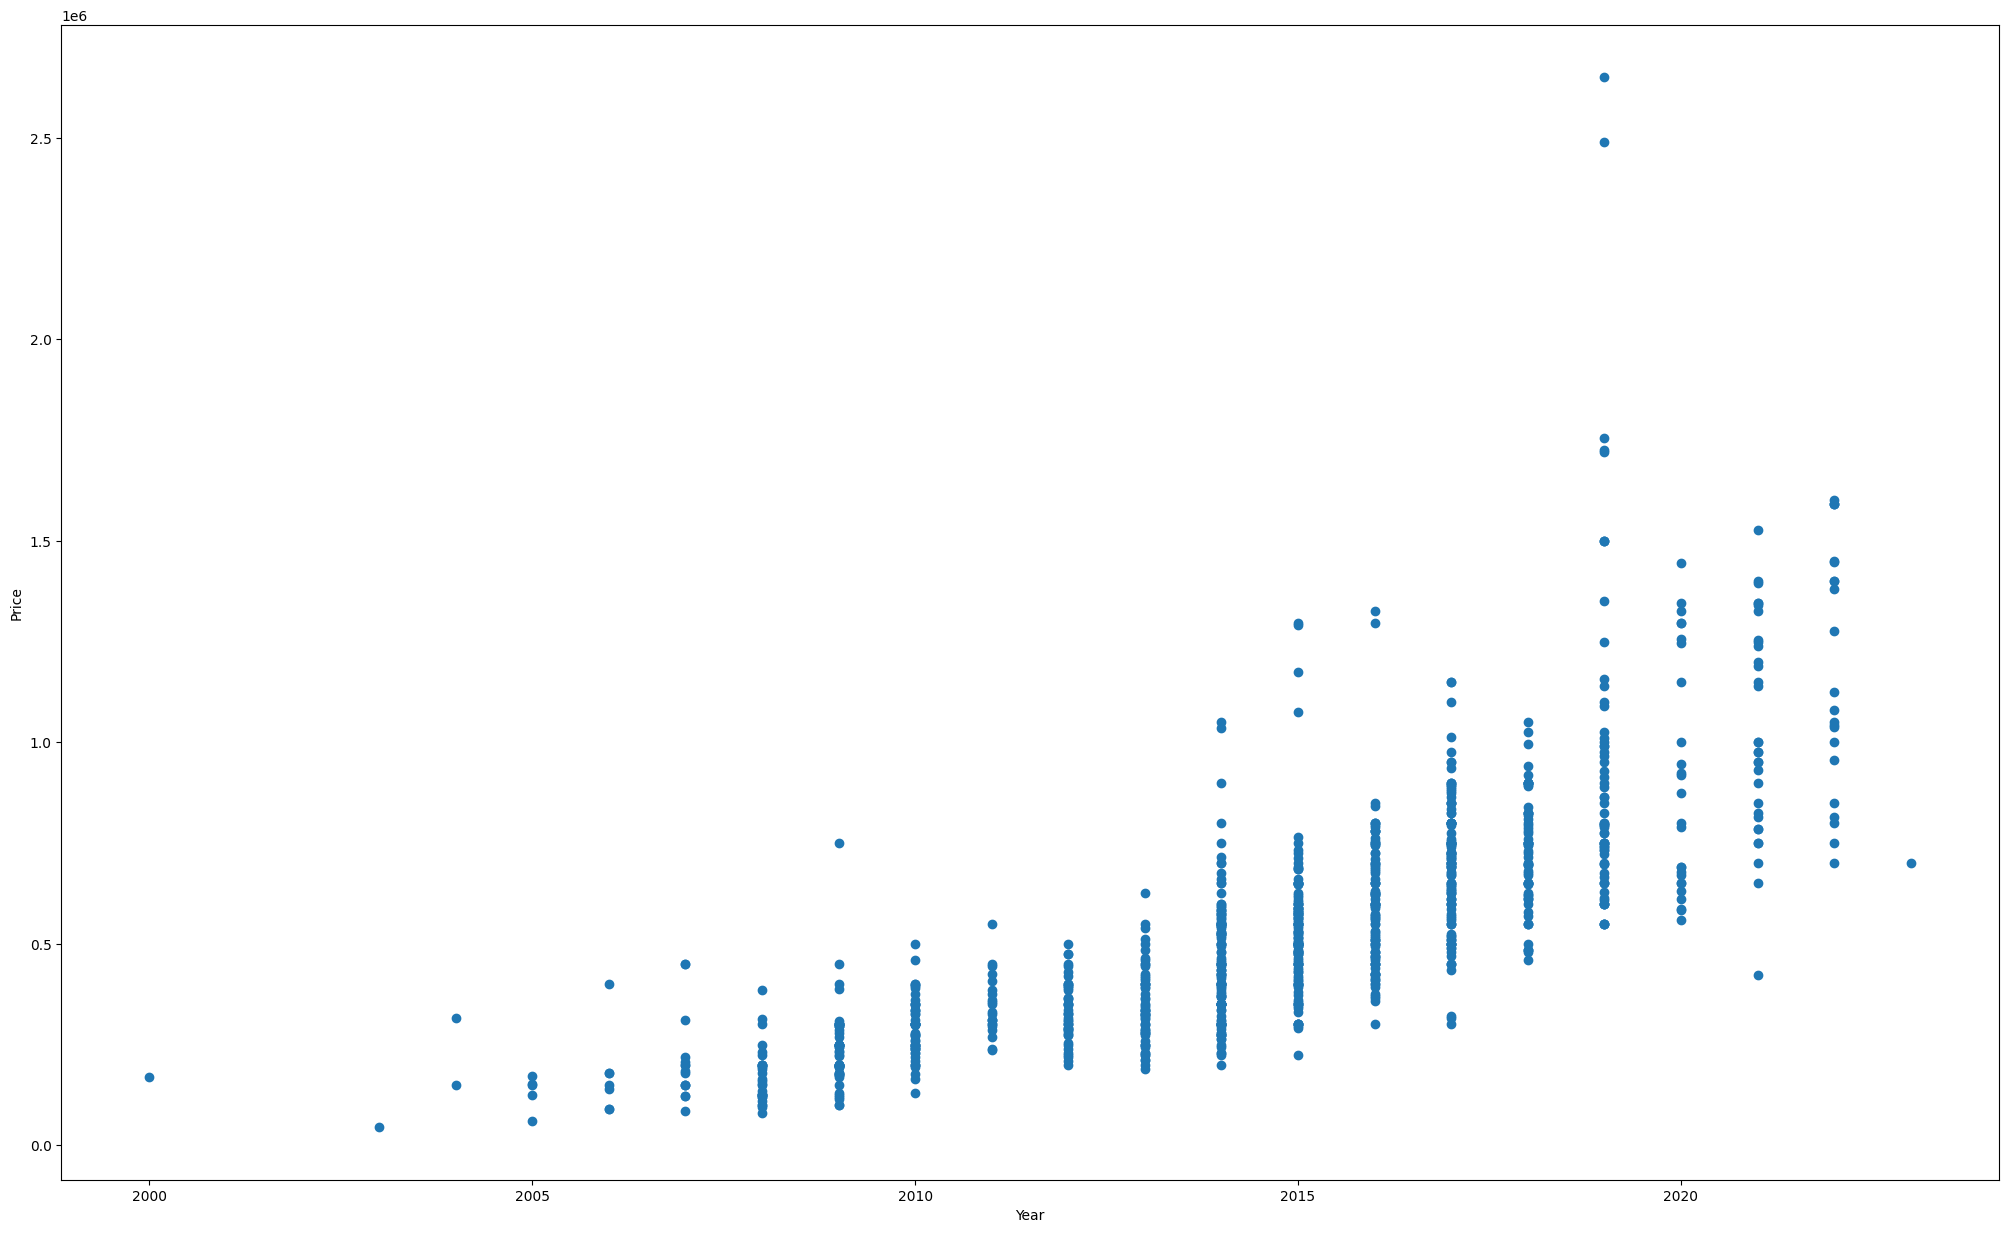

In [102]:
plt.figure(figsize = (25,15))
plt.scatter(data.Year,data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

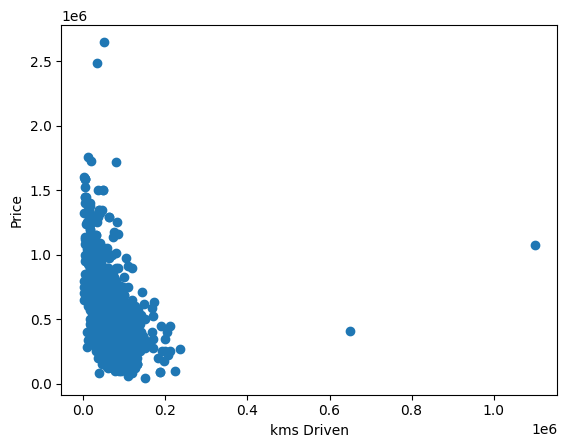

In [103]:
plt.scatter(data["kms Driven"], data["Price"])
plt.xlabel('kms Driven')
plt.ylabel('Price')

In [104]:
data_baru = data[["Car Model", "kms Driven", "Price"]]

In [105]:
print([data_baru])

[                    Car Model  kms Driven      Price
0            Honda City V CVT       19006   929000.0
1           Honda City ZX CVT       11936  1395000.0
2    Honda City i-VTEC CVT ZX       29635   995000.0
3           Honda City ZX CVT       16163  1326000.0
4         Honda City i VTEC V      105114   568000.0
..                        ...         ...        ...
994      Honda Civic 1.8 V MT       90000   122000.0
995      Honda Amaze S i-VTEC       31500   425000.0
996      Honda Amaze S Petrol       39735   510000.0
997       Honda City i VTEC S       36000   610000.0
998     Honda Amaze S i-Dtech       35341   300000.0

[999 rows x 3 columns]]


In [106]:
from sklearn.cluster import KMeans

In [107]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['kms Driven','Price']])
y_predicted

array([1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

In [108]:
data['cluster']=y_predicted
data.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model,cluster
0,2019,19006,Petrol,Automatic,929000.0,Honda City V CVT,1
1,2021,11936,Petrol,Automatic,1395000.0,Honda City ZX CVT,2
2,2018,29635,Petrol,Automatic,995000.0,Honda City i-VTEC CVT ZX,2
3,2020,16163,Petrol,Automatic,1326000.0,Honda City ZX CVT,2
4,2015,105114,Petrol,Manual,568000.0,Honda City i VTEC V,1


In [109]:
km.cluster_centers_

array([[  81828.63870968,  315681.72043011],
       [  53886.62637363,  671013.18681319],
       [  43567.83544304, 1270645.56962025]])

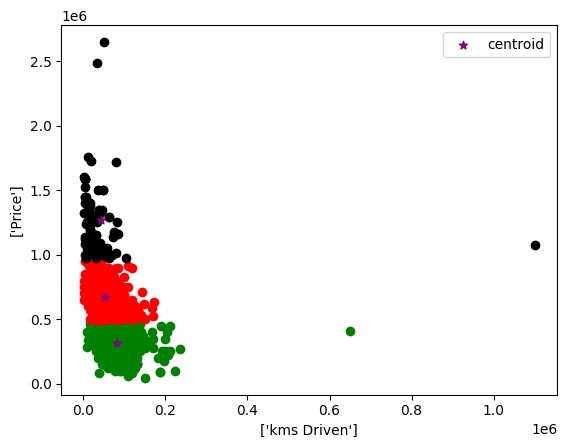

In [110]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.scatter(data1['kms Driven'],data1['Price'],color='green')
plt.scatter(data2['kms Driven'],data2['Price'],color='red')
plt.scatter(data3['kms Driven'],data3['Price'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel(['kms Driven'])
plt.ylabel(['Price'])
plt.legend()

In [111]:
penjualan_terbaik = data['kms Driven'] / data['Price']
penjualan_terbaik

0      0.020459
1      0.008556
2      0.029784
3      0.012189
4      0.185060
         ...   
994    0.737705
995    0.074118
996    0.077912
997    0.059016
998    0.117803
Length: 999, dtype: float64

C:\Users\User\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


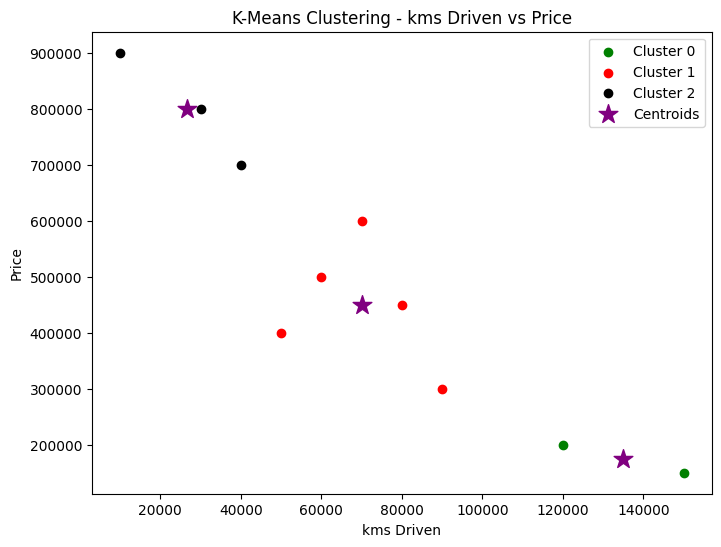

In [112]:
#Load data set
data = pd.DataFrame({
    "kms Driven": [50000, 70000, 30000, 90000, 120000, 40000, 60000, 80000, 150000, 10000],
    "Price": [400000, 600000, 800000, 300000, 200000, 700000, 500000, 450000, 150000, 900000]
})

#Data normalisation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Mengubah data agar memiliki distribusi yang lebih baik

#K means with number of cluster=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data["cluster"] = kmeans.fit_predict(data_scaled)

#separate data by cluster
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]

#Cluster Visualize
plt.figure(figsize=(8, 6))
plt.scatter(data1["kms Driven"], data1["Price"], color="green", label="Cluster 0")
plt.scatter(data2["kms Driven"], data2["Price"], color="red", label="Cluster 1")
plt.scatter(data3["kms Driven"], data3["Price"], color="black", label="Cluster 2")

#show Centroid
centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Konversi kembali jika data dinormalisasi
plt.scatter(centroids[:, 0], centroids[:, 1], color="purple", marker="*", s=200, label="Centroids")

#Label Legend
plt.xlabel("kms Driven")
plt.ylabel("Price")
plt.legend()
plt.title("K-Means Clustering - kms Driven vs Price")
plt.show()
